# OCR Mistral

In [10]:
# Import required libraries
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json
from mistralai.models import OCRResponse
from IPython.display import Markdown, display
import base64


In [6]:
# Initialize Mistral client with API key
from mistralai import Mistral

api_key = "k392FkLbQh8uCZDPjXA0g44yUnRnekPJ" # https://admin.mistral.ai/organization/api-keys
client = Mistral(api_key=api_key)

### PDF Files

In [7]:
# Verify PDF file exists
pdf_file = Path("data/Aufgaben/Übungsblatt-CDS-Mathe1_Ana1_Lösungen-2.pdf")
assert pdf_file.is_file()

# Upload PDF file to Mistral's OCR service
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

# Get URL for the uploaded file
signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

# Process PDF with OCR, including embedded images
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)

# Convert response to JSON format
response_dict = json.loads(pdf_response.model_dump_json())

print(json.dumps(response_dict, indent=4)[0:1000]) # check the first 1000 characters

{
    "pages": [
        {
            "index": 0,
            "markdown": "# $\\stackrel{\\text { F }}{ }$ Fachhochschule Graub\u00fcnden <br> GR University of Applied Sciences \n\n## \u00dcbungsblatt Ana 1\n\nComputational and Data Science BSc HS 2023\n\n## L\u00f6sungen\n\nMathematik 1\n\n## 1. Aussagen \u00fcber zwei Mengen\n\nWir betrachten die Mengen\n\n$$\nA:=\\{0,2,3,4,5,6\\} \\quad \\text { und } \\quad B:=\\{A, 4,5,6,7\\}\n$$\n\n| Welche der folgenden Aussagen sind wahr und welche falsch? | wahr | falsch |\n| :-- | :--: | :--: |\n| a) Die Menge $A$ hat sechs Elemente. | $\\bullet$ | $\\bigcirc$ |\n| b) Die Menge $B$ hat sieben Elemente. | $\\bigcirc$ | $\\bullet$ |\n| c) Es gilt $\\{4\\} \\in A$. | $\\bigcirc$ | $\\bullet$ |\n| d) Es gilt $A \\subset B$. | $\\bigcirc$ | $\\bullet$ |\n| e) Es gilt $B \\ni A$. | $\\bullet$ | $\\bigcirc$ |\n| f) Es gilt $B \\supseteq\\{A\\}$. | $\\bullet$ | $\\bigcirc$ |\n\n## 2. Elementare Mengenoperationen\n\nWir betrachten die Mengen\n\n$$\nA

# $\stackrel{\text { F }}{ }$ Fachhochschule Graubünden <br> GR University of Applied Sciences 

## Übungsblatt Ana 1

Computational and Data Science BSc HS 2023

## Lösungen

Mathematik 1

## 1. Aussagen über zwei Mengen

Wir betrachten die Mengen

$$
A:=\{0,2,3,4,5,6\} \quad \text { und } \quad B:=\{A, 4,5,6,7\}
$$

| Welche der folgenden Aussagen sind wahr und welche falsch? | wahr | falsch |
| :-- | :--: | :--: |
| a) Die Menge $A$ hat sechs Elemente. | $\bullet$ | $\bigcirc$ |
| b) Die Menge $B$ hat sieben Elemente. | $\bigcirc$ | $\bullet$ |
| c) Es gilt $\{4\} \in A$. | $\bigcirc$ | $\bullet$ |
| d) Es gilt $A \subset B$. | $\bigcirc$ | $\bullet$ |
| e) Es gilt $B \ni A$. | $\bullet$ | $\bigcirc$ |
| f) Es gilt $B \supseteq\{A\}$. | $\bullet$ | $\bigcirc$ |

## 2. Elementare Mengenoperationen

Wir betrachten die Mengen

$$
A:=\{1,6,7,9,12\} \quad \text { und } \quad B:=\{2,4,7,8,10,12\}
$$

a) Wir skizzieren das VEnN-Diagramm für die Mengen $A$ und $B$.
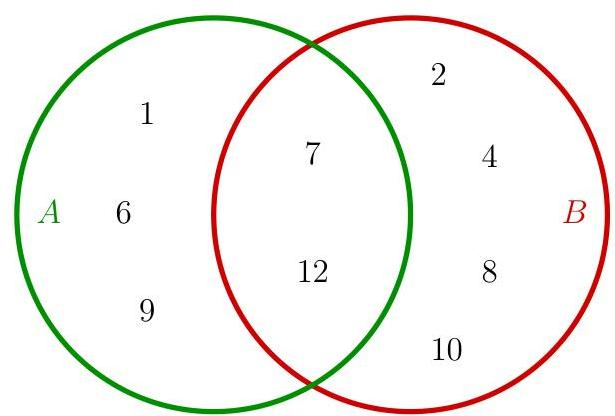

b) Wenn wir alle Elemente sammeln, welche in $A$ und in $B$ liegen, dann erhalten wir die Schnittmenge
$\underline{A \cap B=\{7,12\}}$.
c) Wenn wir alle Elemente sammeln, welche in $A$ oder in $B$ liegen, dann erhalten wir die Vereinigungsmenge
$\underline{A \cup B=\{1,2,4,6,7,8,9,10,12\}}$
d) Wenn wir alle Elemente sammeln, welche in $A$ aber nicht in $B$ liegen, dann erhalten wir die Mengendifferenz
$\underline{A \backslash B=\{1,6,9\}}$.
Sammeln wir hingegen alle Elemente, welche in $B$ aber nicht in $A$ liegen, dann erhalten wir die Mengendifferenz
$\underline{B \backslash A=\{2,4,8,10\}}$.
e) Wir zeigen mehrere Varianten, um die symmetrische Mengendifferenz $A \Delta B$ zu berechnen.
Variante 1: Die Menge $A \Delta B$ ist die Vereinigung der beiden Mengendifferenzen aus Teilaufgabe d). Wir erhalten

$$
\underline{A \Delta B}=(A \backslash B) \cup(B \backslash A)=\{1,6,9\} \cup\{2,4,8,10\}=\underline{\{1,2,4,6,8,9,10\}}
$$

Variante 2: Die Menge $A \Delta B$ ist die Mengendifferenz der Vereinigungsmenge von $A$ und $B$ aus Teilaufgabe c) ohne die Schnittmenge von $A$ und $B$ aus Teilaufgabe b). Wir erhalten

$$
\begin{aligned}
\underline{A \Delta B} & =(A \cup B) \backslash(B \cap A)=\{1,2,4,6,7,8,9,10,12\} \backslash\{7,12\} \\
& =\underline{\{1,2,4,6,8,9,10\}}
\end{aligned}
$$

f) Wir suchen alle Teilmengen von
$C:=A \cap B=\{7,12\}$.
Da $C$ zwei Elemente hat, hat jede Teilmenge von $C$ entweder null, ein oder zwei Elemente. Wir bestimmen für jede mögliche Anzahl Elemente die zugehörigen Teilmengen von $C$ und stellen die Ergebnisse in einer Tabelle zusammen.

| Anzahl Elemente | Teilmengen |
| :--: | :-- |
| 0 | $\varnothing$ |
| 1 | $\{7\},\{12\}$ |
| 2 | $\{7,12\}$ |

Insgesamt haben wir also vier Teilmengen von $C$ gefunden. Alle Teilmengen ausser $C$ selbst sind echte Teilmengen von $C$, d.h.

$$
\varnothing,\{7\} \quad \text { und } \quad\{12\}
$$

# 3. Mengen und Operationen in einer Grundmenge 

Wir betrachten die Grundmenge $G$ der Kleinbuchstaben des lateinischen Alphabetes ohne Umlaute, d.h.

$$
G:=\{a, \ldots, z\}
$$

Ferner seien

$$
A:=\{m, a, t, h, e\}, B:=\{i, s, t, m, e, g, a\} \quad \text { und } \quad C:=\{g, e, n, i, a, l\}
$$

sowie

$$
D:=A \cap B \cap C \quad \text { und } \quad E:=A \cup B \cup C
$$

a) Wir skizzieren das VENn-Diagramm für die drei Mengen $A, B, C$ in der Grundmenge $G$.
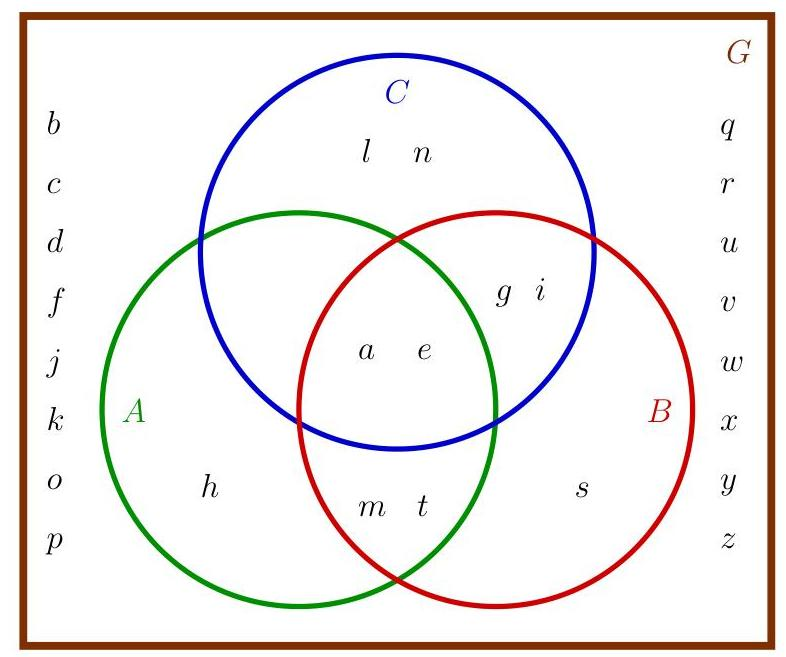
b) Mit Hilfe des VENn-Diagramms aus Teilaufgabe a) bestimmen wir die Schnittmengen. Wir erhalten

$$
\begin{aligned}
& \underline{A \cap B}=\underline{\{a, e, m, t\}} \\
& \underline{A \cap C}=\underline{\{a, e\}} \\
& \underline{C \cap B}=\underline{\{a, e, g, i\}}
\end{aligned}
$$

und

$$
\underline{D=\{a, e\}}
$$

c) Mit Hilfe des VENn-Diagramms aus Teilaufgabe a) bestimmen wir die Vereinigungsmengen. Wir erhalten

$$
\underline{A \cup B}=\underline{\{a, e, g, h, i, m, t, s\}}
$$

$\underline{\underline{A \cup C}}=\{a, e, g, h, i, l, m, n, t\}$
$\underline{\underline{C \cup B}}=\underline{\{a, e, g, i, l, m, n, t, s\}}$
und
$\underline{E=\{a, e, g, h, i, l, m, n, t, s\}}$.
d) Für das Komplement der Schnittmenge $D$ erhalten wir

$$
\underline{\bar{D}}=G \backslash D=\{a, \ldots, z\} \backslash\{a, e\}=\underline{\{b, c, d, f, \ldots, z\}}
$$

Mit Hilfe des Venn-Diagramms aus Teilaufgabe a) bestimmen wir das Komplement der Vereinigungsmenge E. Es gilt

$$
\underline{\bar{E}}=G \backslash E=\underline{\{b, c, d, f, j, k, o, p, q, r, u, v, w, x, y, z\}}
$$

# 4. Aussagen über rationale Zahlen 

| Welche der folgenden Aussagen sind wahr und welche falsch? | wahr | falsch |
| :-- | :-- | :-- |
| a) Jede rationale Zahl kann als Bruch von zwei ganzen Zahlen dargestellt <br> werden. | $\bullet$ | $\bigcirc$ |
| b) Es gilt $\mathbb{Q} \supset \mathbb{Z}$. | $\bullet$ | $\bigcirc$ |
| c) Es gilt $\sqrt{9} \notin \mathbb{Q}$. | $\bigcirc$ | $\bullet$ |
| d) Die Wurzel einer rationalen Zahl ist selbst auch rational. | $\bigcirc$ | $\bullet$ |
| e) Alle periodischen Dezimalbrüche sind rational. | $\bullet$ | $\bigcirc$ |

## 5. Aussagen über reelle Zahlen

| Welche der folgenden Aussagen sind wahr und welche falsch? | wahr | falsch |
| :-- | :-- | :-- |
| a) Jede rationale Zahl ist auch eine reelle Zahl, aber nicht umgekehrt. | $\bullet$ | $\bigcirc$ |
| b) Es gilt $\infty \in \mathbb{R}$. | $\bigcirc$ | $\bullet$ |
| c) Falls $x, y \in \mathbb{R}$ und $x \leq y$ sowie $y \leq x$, dann gilt $x=y$. | $\bullet$ | $\bigcirc$ |
| d) Die Wurzel jeder reellen Zahl ist auch eine reelle Zahl. | $\bigcirc$ | $\bullet$ |
| e) Alle Dezimalbrüche sind reelle Zahlen. | $\bullet$ | $\bigcirc$ |

# 6. Elemente von Zahlenmengen 

Wir markieren für jede Zahl die Mengen, von welchen die Zahl ein Element ist.

|  | $x$ | $\mathbb{N}$ | $\mathbb{N}^{+}$ | $\mathbb{Z}$ | $\mathbb{Q}$ | $\mathbb{R}$ | $\mathbb{R}_{0}^{+}$ | $\mathbb{R}^{-}$ | $[-1,1]$ | $] 0,2[$ | $]-\infty, 1[$ | $[0, \infty[$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| a) | $-1$ | $\square$ | $\square$ | ■ | ■ | ■ | $\square$ | ■ | ■ | $\square$ | ■ | $\square$ |
| b) | 0.5 | $\square$ | $\square$ | $\square$ | ■ | ■ | ■ | $\square$ | ■ | ■ | ■ | ■ |
| c) | $-1 / 3$ | $\square$ | $\square$ | $\square$ | ■ | ■ | $\square$ | ■ | ■ | $\square$ | ■ | $\square$ |
| d) | $\sqrt{3}$ | $\square$ | $\square$ | $\square$ | $\square$ | ■ | ■ | $\square$ | $\square$ | ■ | $\square$ | ■ |
| e) | 0.33 | $\square$ | $\square$ | $\square$ | ■ | ■ | ■ | $\square$ | ■ | ■ | ■ | ■ |
| f) | $\sqrt{25}$ | ■ | ■ | ■ | ■ | ■ | ■ | $\square$ | $\square$ | $\square$ | $\square$ | ■ |
| g) | $-6 / 3$ | $\square$ | $\square$ | ■ | ■ | ■ | $\square$ | ■ | $\square$ | $\square$ | ■ | $\square$ |
| h) | $-\sqrt{2 / 3}$ | $\square$ | $\square$ | $\square$ | $\square$ | ■ | $\square$ | ■ | ■ | $\square$ | ■ | $\square$ |
| i) | 7.34385 | $\square$ | $\square$ | $\square$ | ■ | ■ | ■ | $\square$ | $\square$ | $\square$ | $\square$ | ■ |
| j) | $-0.99$ | $\square$ | $\square$ | ■ | ■ | ■ | $\square$ | ■ | ■ | $\square$ | ■ | $\square$ |

## 7. Aussagen über Intervalle

| Welche der folgenden Aussagen sind wahr und welche falsch? | wahr | falsch |
| :-- | :-- | :-- |
| a) Es gilt $[1,10] \subset \mathbb{N}$. | $\bigcirc$ | $\bullet$ |
| b) Es gilt $] 2,3[\cap \mathbb{Z}=\varnothing$. | $\bullet$ | $\bigcirc$ |
| c) Für alle $a, b \in \mathbb{R}$ mit $a<b$ gilt $] a, b] \subset[a, b[$. | $\bigcirc$ | $\bullet$ |
| d) Für alle $x \in \mathbb{R}$ gilt $]-\infty, x] \cap\left[x, \infty[=\{x\}\right.$. | $\bullet$ | $\bigcirc$ |
| e) Falls $] a, b[\cap] c, d[=\varnothing$, dann gilt $c>b$. | $\bigcirc$ | $\bullet$ |
| f) Für alle $a, b \in \mathbb{R}$ mit $a<b$ gilt $[a, b] \cap \mathbb{Q} \neq \varnothing$. | $\bullet$ | $\bigcirc$ |

## 8. Aussagen über das kartesische Produkt

| Welche der folgenden Aussagen sind wahr und welche falsch? | wahr | falsch |
| :-- | :-- | :-- |
| a) Das kartesische Produkt ist eine Operation zwischen zwei Zahlen. | $\bigcirc$ | $\bullet$ |
| b) Das kartesische Produkt ist eine Operation zwischen zwei Mengen. | $\bullet$ | $\bigcirc$ |
| c) In jedem Fall gilt $A \times B=B \times A$. | $\bigcirc$ | $\bullet$ |
| d) Kartesische Produkte können nur zwischen Mengen gebildet werden, wel- <br> che aus Zahlen bestehen. | $\bigcirc$ | $\bullet$ |
| e) Haben $A$ und $B$ jeweils 10 Elemente, dann haben $A \times B$ und $B \times A$ jeweils <br> 100 Elemente. | $\bullet$ | $\bigcirc$ |
| f) Für jede Menge $A$ gilt $\varnothing \times A=A$. | $\bigcirc$ | $\bullet$ |

# 9. Kartesische Produkte 

Wir bestimmen die folgenden kartesischen Produkte und stellen diese auf sinnvolle Weise dar.
a) Wir betrachten die Menge

$$
\underline{A}=\{1,2\} \times\{1,2\}=\underline{\{(1 ; 1),(1 ; 2),(2 ; 1),(2 ; 2)\}}
$$

b) Wir betrachten die Menge

$$
\underline{B}=\{1,2\} \times\{2,3,4\}=\underline{\{(1 ; 2),(1 ; 3),(1 ; 4),(2 ; 2),(2 ; 3),(2 ; 4)\}}
$$

c) Wir betrachten die Menge

$$
\underline{C}=\{2,3,4\} \times\{1,2\}=\underline{\{(2 ; 1),(2 ; 2),(3 ; 1),(3 ; 2),(4 ; 1),(4 ; 2)\}}
$$

Wir stellen die Mengen

$$
D=[0,1] \times\{1,2\}, E=\{1,2\} \times[0,1] \quad \text { und } \quad F=[0,1] \times[1,2]
$$

jeweils in einem $x y$-Diagramm dar.
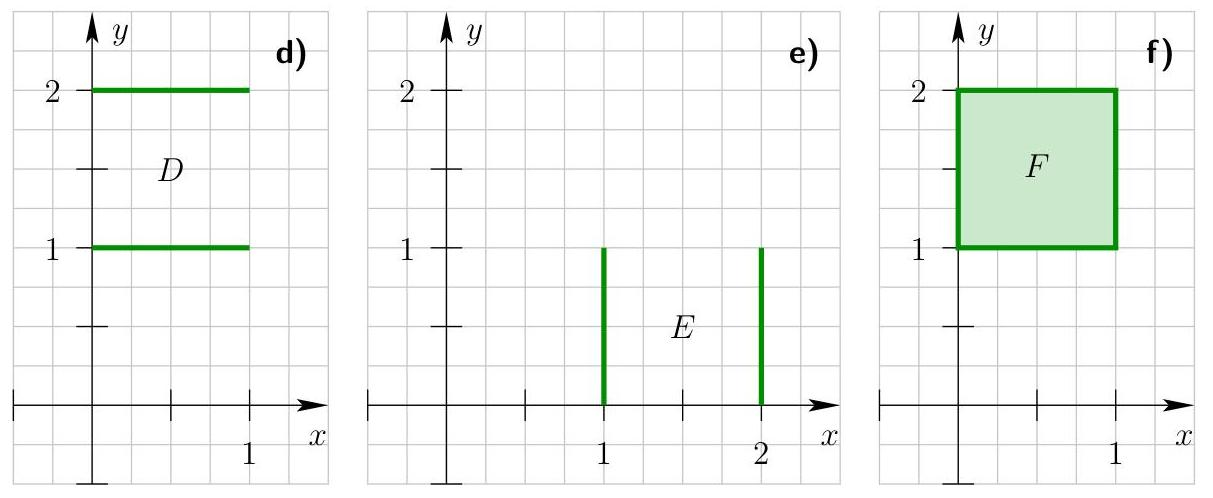

## 10. Aussagen über zwei Mengen

Wir betrachten die Mengen

$$
A:=\{-1,0,1\} \quad \text { und } \quad B:=\{3,4,5\}
$$

| Welche der folgenden Aussagen sind wahr und welche falsch? | wahr | falsch |
| :-- | :-- | :-- |
| a) Die Menge $A \times B$ hat drei Elemente. | $\bigcirc$ | $\bullet$ |
| b) Es gilt $-1 \in A \times B$. | $\bigcirc$ | $\bullet$ |
| c) Es gilt $(3 ; 0) \in B \times A$. | $\bullet$ | $\bigcirc$ |
| d) Es gilt $A \times B=B \times A$. | $\bigcirc$ | $\bullet$ |
| e) Die graphische Darstellung von $A \times B$ im $x y$-Diagramm ist ein Rechteck. | $\bigcirc$ | $\bullet$ |
| f) Es gilt $A \times B \subset \mathbb{Z} \times \mathbb{N}$. | $\bullet$ | $\bigcirc$ |

### Images

In [12]:
# Verify image exists
image_file = Path("data/Theorie/bild1.jpg")
assert image_file.is_file()

# Encode image as base64 for API
encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

# Process image with OCR
image_response = client.ocr.process(
    document=ImageURLChunk(image_url=base64_data_url),
    model="mistral-ocr-latest"
)

# Convert response to JSON
response_dict = json.loads(image_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "pages": [
        {
            "index": 0,
            "markdown": "# Abbildungen \n\n- grundlegendes konzept in Mathe\n- einem element der Henge $A$ wird ein element der Henge $B$ zugeordnet\n\n$$\nA \\rightarrow F\\left({ }^{\\circ} B\\right)\n$$\n\nDef: Eine Abbildung $f$ aus einer Henge $A$ in eine Henge $B$ ist eine Vorschrift, die jedem $a \\in A$ genau ein $b=f(a) \\in f(b) \\subseteq B$ zuordnet.\nA : Definitionsmenge\nB : Werte-/Zielmenge\n$f(A):$ Bild (menge)\n\n$$\n=f b \\in B \\mid \\exists a \\in A \\text { mit } b=f(a) \\text { ? }\n$$\n\n$\\rightarrow$ Zielmenge $B$ da $f$ gr\u00f6sser als $f(A)$ sein\n$\\rightarrow$ Abbildung ist eindeutig definiert durch Definitionsmenge, Zielmenge und Abbildungsvorschrift\nSchreibweise : $f: A \\rightarrow B$\n\n$$\n\\begin{aligned}\n& a \\rightarrow f(a) \\\\\n& b \\rightarrow f(b)\n\\end{aligned}\n$$\n\na: unabh\u00e4ngige Variable, Argument\nb : abh\u00e4ngige Variable\nBsp: $\\quad f: f 1,2 f \\rightarrow f 3,5,6 f$\n\n$$\

In [14]:
# extract structrued data from OCR results with additional pixtral-12b-latest

# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))


{
    "concept": "grundlegendes konzept in Mathe",
    "mapping": {
        "source_set": "A",
        "target_set": "B",
        "assignment": "einem element der Henge A wird ein element der Henge B zugeordnet"
    },
    "definition": {
        "formal_definition": "Eine Abbildung f aus einer Henge A in eine Henge B ist eine Vorschrift, die jedem a \\in A genau ein b=f(a) \\in f(b) \\subseteq B zuordnet."
    },
    "notations": {
        "domain": "A",
        "codomain": "B",
        "image": "f(A)"
    },
    "image_set": "= {b \\in B \\mid \\exists a \\in A \\text{ mit } b=f(a)}",
    "target_set_constraint": "Zielmenge B da f gr\u00f6sser als f(A) sein",
    "uniqueness": "Abbildung ist eindeutig definiert durch Definitionsmenge, Zielmenge und Abbildungsvorschrift",
    "notation_format": "f: A \\rightarrow B",
    "mapping_format": {
        "input": "a \\rightarrow f(a)",
        "output": "b \\rightarrow f(b)"
    },
    "variables": {
        "independent_variable": "a",
   

In [15]:
#text-only models for the structured output

# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))


{
    "title": "Abbildungen",
    "content": [
        {
            "description": "Grundlegendes Konzept in Mathe",
            "equation": "A \u2192 F(\u00b0B)"
        },
        {
            "definition": "Eine Abbildung f aus einer Menge A in eine Menge B ist eine Vorschrift, die jedem a \u2208 A genau ein b = f(a) \u2208 f(b) \u2286 B zuordnet.",
            "variables": {
                "A": "Definitionsmenge",
                "B": "Werte-/Zielmenge",
                "f(A)": "Bild (Menge)"
            },
            "equation": "= b \u2208 B | \u2203 a \u2208 A mit b = f(a) ?"
        },
        {
            "description": "Zielmenge B da f gr\u00f6\u00dfer als f(A) sein",
            "description2": "Abbildung ist eindeutig definiert durch Definitionsmenge, Zielmenge und Abbildungsvorschrift",
            "notation": "f: A \u2192 B"
        },
        {
            "description": "a: unabh\u00e4ngige Variable, Argument",
            "description2": "b: abh\u00e4ngige Variab

## All together - Mistral OCR + Custom Structure Output

In [16]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64

In [ ]:
class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: str
    ocr_contents: dict

def structured_ocr(image_path: str) -> StructuredOCR:
    """
    Process an image using OCR and extract structured data.
    Args: image_path: Path to the image file to process
    Returns: StructuredOCR object containing the extracted data
    Raises: AssertionError: If the image file does not exist
    """
    # Validate input file
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(
        document=ImageURLChunk(image_url=base64_data_url),
        model="mistral-ocr-latest"
    )
    image_ocr_markdown = image_response.pages[0].markdown

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        f"This is the image's OCR in markdown:\n{image_ocr_markdown}\n.\n"
                        "Convert this into a structured JSON response "
                        "with the OCR contents in a sensible dictionnary."
                        )
                    )
                ]
            }
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

In [18]:
# Example usage
image_path = "data/Theorie/bild1.jpg" # Path to sample receipt image
structured_response = structured_ocr(image_path) # Process image and extract data

# Parse and return JSON response
response_dict = json.loads(structured_response.model_dump_json())
print(json.dumps(response_dict, indent=4))

{
    "file_name": "Abbildungen",
    "topics": [
        "Mathematical Concepts",
        "Functions and Mappings",
        "Definitions and Images"
    ],
    "languages": "German",
    "ocr_contents": {}
}


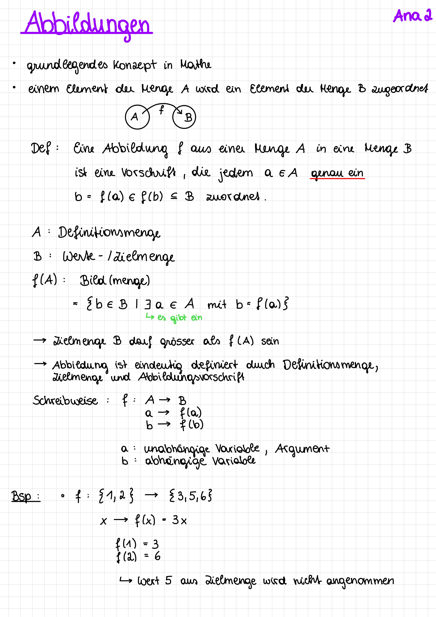

In [19]:
from PIL import Image

image = Image.open(image_path)
image.resize((image.width // 5, image.height // 5))


OCR without Pixtral

In [ ]:
from pathlib import Path
from pydantic import BaseModel
from mistralai import Mistral
import json

# Represents OCR output for a single PDF page
class PDFPageOutput(BaseModel):
    page_number: int
    markdown: str
    raw_page_json: dict

# Represents OCR output for a full PDF document
class PDFDocumentOutput(BaseModel):
    file_name: str
    pages: list[PDFPageOutput]


# PDF OCR Processor (similar to your image OCR structure)
class PDFOCRProcessor:
    def __init__(self, client: Mistral, output_dir: Path):
        # Store client and output directory
        self.client = client
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(parents=True, exist_ok=True)

    # Replace image placeholders with base64 inline images
    def _replace_images(self, markdown_str: str, images: dict[str, str]) -> str:
        for img_id, base64_data in images.items():
            markdown_str = markdown_str.replace(
                f"![{img_id}]({img_id})",
                f"![{img_id}](data:image/png;base64,{base64_data})"
            )
        return markdown_str

    # Main pipeline: PDF -> OCR -> markdown per page
    def process_pdf(self, pdf_path: Path) -> PDFDocumentOutput:
        # Validate PDF
        assert pdf_path.is_file(), f"PDF not found: {pdf_path}"

        # Upload PDF to Mistral
        uploaded = self.client.files.upload(
            file={
                "file_name": pdf_path.stem,
                "content": pdf_path.read_bytes(),
            },
            purpose="ocr",
        )

        # Generate signed URL for OCR
        signed_url = self.client.files.get_signed_url(
            file_id=uploaded.id,
            expiry=1
        )

        # Run OCR
        ocr_response = self.client.ocr.process(
            document={"document_url": signed_url.url},
            model="mistral-ocr-latest",
            include_image_base64=True
        )

        pages_output = []
        doc_dir = self.output_dir / pdf_path.stem
        doc_dir.mkdir(parents=True, exist_ok=True)

        # Process each page
        for i, page in enumerate(ocr_response.pages):
            page_number = i + 1

            # Extract images
            image_map = {img.id: img.image_base64 for img in page.images}

            # Replace placeholders in markdown
            markdown = self._replace_images(page.markdown, image_map)

            # Save markdown
            (doc_dir / f"page_{page_number}.md").write_text(
                markdown, encoding="utf-8"
            )

            # Save raw JSON
            raw_json = json.loads(page.model_dump_json())
            (doc_dir / f"page_{page_number}.json").write_text(
                json.dumps(raw_json, indent=4), encoding="utf-8"
            )

            # Add output model
            pages_output.append(
                PDFPageOutput(
                    page_number=page_number,
                    markdown=markdown,
                    raw_page_json=raw_json
                )
            )

        # Return structured document result
        return PDFDocumentOutput(
            file_name=pdf_path.stem,
            pages=pages_output
        )


In [ ]:
from pathlib import Path
from mistralai import Mistral

# Initialize client and processor
client = Mistral(api_key="YOUR_API_KEY")
processor = PDFOCRProcessor(
    client=client,
    output_dir=Path("data_processed/Analysis1")
)

# Directory containing your PDFs
pdf_dir = Path("data/Analysis1")
pdf_files = list(pdf_dir.glob("*.pdf"))

# Process every PDF in the folder
for pdf in pdf_files:
    print(f"Processing: {pdf.name}")
    processor.process_pdf(pdf)

print("All PDFs processed successfully.")
